<a href="https://colab.research.google.com/github/sue23/BMIKin_DataAnalysis/blob/master/testingMLSitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifier comparison
A comparison of a several classifiers in scikit-learn on synthetic datasets. The point of this example is to illustrate the nature of decision boundaries of different classifiers. This should be taken with a grain of salt, as the intuition conveyed by these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated linearly and the simplicity of classifiers such as naive Bayes and linear SVMs might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points semi-transparent. The lower right shows the classification accuracy on the test set.

[Studia Scikit](https://scikit-learn.org/stable/user_guide.html)

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# get correlation matrix plot for loadings
import seaborn as sns
#from bioinfokit.analys import get_data

from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

Vediamo i nostri dati

In [ ]:
df_0 = pd.read_csv("/content/drive/MyDrive/Data/Sitting/Sitting_score_0.csv" ,sep=',')
df_1 = pd.read_csv("/content/drive/MyDrive/Data/Sitting/Sitting_score_1.csv" ,sep=',')
df_2 = pd.read_csv("/content/drive/MyDrive/Data/Sitting/Sitting_score_2.csv",sep=',')
df_3 = pd.read_csv("/content/drive/MyDrive/Data/Sitting/Sitting_score_3.csv",sep=',')
df_4 = pd.read_csv("/content/drive/MyDrive/Data/Sitting/Sitting_score_4.csv" ,sep=',')

df_0 = df_0.drop('filename', 1)
df_1 = df_1.drop('filename', 1)
df_2 = df_2.drop('filename', 1)
df_3 = df_3.drop('filename', 1)
df_4 = df_4.drop('filename', 1)

[no_0,p_0] = df_0.shape
[no_1,p_1] = df_1.shape
[no_2,p_2] = df_2.shape
[no_3,p_3] = df_3.shape
[no_4,p_4] = df_4.shape

label_0 = np.zeros(no_0)
label_1 = np.ones(no_1)
label_2 = 2*np.ones(no_2)
label_3 = 3*np.ones(no_3)
label_4 = 4*np.ones(no_4)

data_all = pd.concat([df_0,df_1,df_2,df_3])

# n_occ = number of occurences , n_pre = number of predictors
[n_occ, n_pre] = data_all.shape


label = np.concatenate((label_0, label_1, label_2, label_3))
label = np.reshape(label,(n_occ,1))

final_data = np.concatenate([data_all,label],axis = 1)

df_data = pd.DataFrame(final_data)

predictors_name = np.append(df_0.columns,'label')


# PCA in python

One important thing to note about PCA is that it is an Unsupervised dimensionality reduction technique, you can cluster the similar data points based on the feature correlation between them without any supervision (or labels).

PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components.

You start by Standardizing the data since PCA's output is influenced based on the scale of the features of the data. It is a common practice to normalize your data before feeding it to any machine learning algorithm.

To apply normalization, you will import StandardScaler module from the sklearn library. Once you have the features, you will then apply scaling by doing fit_transform on the feature data.

While applying StandardScaler, each feature of your data should be normally distributed such that it will scale the distribution to a mean of zero and a standard deviation of one.


          feature0  feature1  feature2  feature3  feature4  feature5
feature0  1.000000  0.929950  0.067046  0.725218  0.856240  0.808579
feature1  0.929950  1.000000  0.056821  0.802831  0.774358  0.820004
feature2  0.067046  0.056821  1.000000  0.055443 -0.072140 -0.096334
feature3  0.725218  0.802831  0.055443  1.000000  0.503260  0.712921
feature4  0.856240  0.774358 -0.072140  0.503260  1.000000  0.835965
feature5  0.808579  0.820004 -0.096334  0.712921  0.835965  1.000000


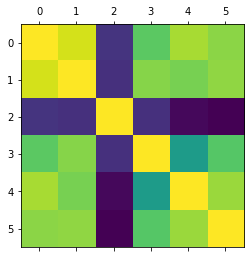

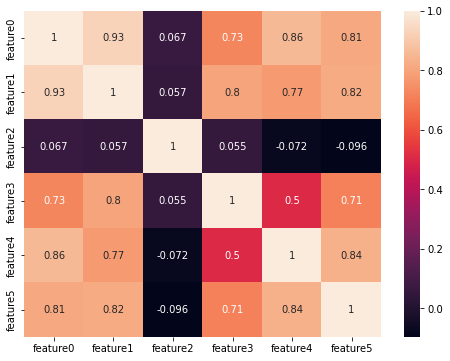

(56, 6)
['a_spineShoulder' 'Coefvar_AP' 'Coefvar_ML' 'Maxdev_AP' 'Maxdev_ML'
 'Length_tot']


In [ ]:
# Now you with numpy I will be reshaping the labels to concatenate it with the data
# so that I can finally create a DataFrame which will have both the data and labels

df_data.columns = predictors_name
df_data['label'].replace(0,'Zero',inplace=True)
df_data['label'].replace(1,'Uno',inplace=True)
df_data['label'].replace(2,'Due',inplace=True)
df_data['label'].replace(3,'Tre',inplace=True)

x = df_data.loc[:,df_0.columns].values


x = StandardScaler().fit_transform(x)

np.mean(x), np.std(x)

feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_sitting = pd.DataFrame(x,columns=feat_cols)

print(normalised_sitting.corr())

plt.matshow(normalised_sitting.corr())

plt.figure(figsize=(8,6))
sns.heatmap(normalised_sitting.corr(),annot=True)
plt.show()
# Coefvar_ML quindi il terzo predittore ha bassa correlazione con le altre variabili
# il forzare tale variabile a fondersi con altre comporterà una perdita di 
# informazione molto elevata e questa è una situazione che in genere si preferisce evitare.

x_new = np.copy(x)#np.copy(x[:,[0,1,3,5]])
label_new = predictors_name[[0,1,2,3,4,5]]#[[0,1,3,4]]
print(x_new.shape)
print(label_new)




**Let's compute PCA with 2 components**

Once you have the principal components, you can find the explained_variance_ratio. It will provide you with the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace.



In [ ]:

#pca 2
pca_sitting = PCA(n_components = 2).fit(x_new)

principalComponents_sitting = pca_sitting.transform(x_new)

principal_sitting_Df = pd.DataFrame(data = principalComponents_sitting, columns = ['principal component 1', 'principal component 2'])

print(principalComponents_sitting.shape)

print('Explained variation per principal component: {}'.format(pca_sitting.explained_variance_ratio_))

print(np.cumsum(pca_sitting.explained_variance_ratio_))

# component loadings or weights (correlation coefficient between original variables and the component) 
# component loadings represents the elements of the eigenvector
# the squared loadings within the PCs always sums to 1
loadings = pca_sitting.components_
num_pc = pca_sitting.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
print(loadings_df)
print(label_new)
loadings_df['label'] = label_new
loadings_df = loadings_df.set_index('label')
loadings_df

# positive and negative values in component loadings reflects the positive and negative 
# correlation of the variables with the PCs. 

(56, 2)
Explained variation per principal component: [0.68673789 0.17301454]
[0.68673789 0.85975243]
        PC1       PC2
0  0.470689 -0.066422
1  0.470960 -0.074945
2  0.001850 -0.971020
3  0.404102 -0.115681
4  0.432769  0.130406
5  0.453936  0.129243
['a_spineShoulder' 'Coefvar_AP' 'Coefvar_ML' 'Maxdev_AP' 'Maxdev_ML'
 'Length_tot']


,PC1,PC2
label,,
a_spineShoulder,0.470689,-0.066422
Coefvar_AP,0.470960,-0.074945
Coefvar_ML,0.001850,-0.971020
Maxdev_AP,0.404102,-0.115681
Maxdev_ML,0.432769,0.130406
Length_tot,0.453936,0.129243


In [ ]:
# Questo crea le figure quando uso 2 PCS

fig = plt.figure(figsize=(10,10))

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)

plt.title("Principal Component Analysis of Sitting Dataset",fontsize=20)
targets = ['Zero', 'Uno', 'Due','Tre']
colors = ['r', 'g', 'b', 'k']
#print(principal_sitting_Df)
for target, color in zip(targets,colors):
    indicesToKeep = df_data['label'] == target
    
    plt.scatter(principal_sitting_Df.loc[indicesToKeep, 'principal component 1'], principal_sitting_Df.loc[indicesToKeep, 'principal component 1'],c=color)

plt.legend(targets,prop={'size': 15},loc='center left')
plt.show()

**Let's compute PCA with 3 components**

(56, 3)
Explained variation per principal component: [0.68673789 0.17301454 0.08379393]
[0.68673789 0.85975243 0.94354636]


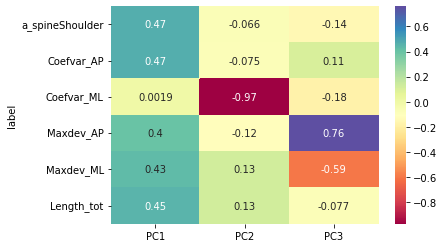

In [ ]:
#pca_sitting = PCA(n_components = 3)
pca_sitting = PCA(n_components = 3).fit(x_new)

principalComponents_sitting = pca_sitting.transform(x_new) #score di matlab

principal_sitting_Df = pd.DataFrame(data = principalComponents_sitting, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
print(principalComponents_sitting.shape)

print('Explained variation per principal component: {}'.format(pca_sitting.explained_variance_ratio_))

print(np.cumsum(pca_sitting.explained_variance_ratio_))

# component loadings or weights (correlation coefficient between original variables and the component) 
# component loadings represents the elements of the eigenvector
# the squared loadings within the PCs always sums to 1
loadings = pca_sitting.components_
num_pc = pca_sitting.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['label'] = label_new
loadings_df = loadings_df.set_index('label')
loadings_df

# positive and negative values in component loadings reflects the positive and negative 
# correlation of the variables with the PCs. 

ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

Let's plot the visualization of the samples along the principal component - 1 and principal component - 2 axis. It should give you good insight into how your samples are distributed among the two classes.

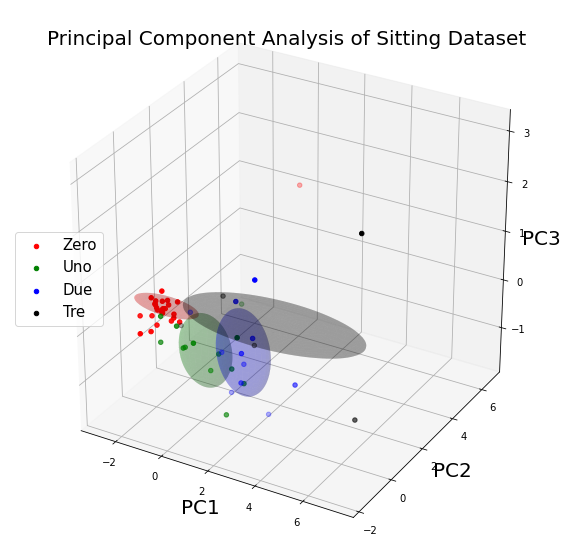

In [ ]:
# Questo è quando uso 3 pca

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel('PC1',fontsize=20)
ax.set_ylabel('PC2',fontsize=20)
ax.set_zlabel('PC3',fontsize=20)
plt.title("Principal Component Analysis of Sitting Dataset",fontsize=20)
targets = ['Zero', 'Uno', 'Due','Tre']
colors = ['r', 'g', 'b', 'k']


# For N standard deviations spread of data, the radii of the eliipsoid
# will be given by N*SQRT(eigenvalues)


# Set of all spherical angles:
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)


N=1

for target, col in zip(targets,colors):
    indicesToKeep = df_data['label'] == target
    
    ax.scatter3D(principal_sitting_Df.loc[indicesToKeep, 'principal component 1'], principal_sitting_Df.loc[indicesToKeep, 'principal component 2'],principal_sitting_Df.loc[indicesToKeep, 'principal component 3'],c=col)
    
ax.legend(targets,prop={'size': 15},loc='center left')

for target, col in zip(targets,colors):
    indicesToKeep = df_data['label'] == target
    score = np.array([principal_sitting_Df.loc[indicesToKeep, 'principal component 1'], principal_sitting_Df.loc[indicesToKeep, 'principal component 2'],principal_sitting_Df.loc[indicesToKeep, 'principal component 3']])
    
    Xc = np.mean(score[0,:])
    Yc = np.mean(score[1,:])
    Zc = np.mean(score[2,:])
    score_cov = np.cov(score.T,rowvar=False)
    eigvals, eigvecs = np.linalg.eig(score_cov)
    radii = N*np.sqrt(eigvals)
    # Cartesian coordinates that correspond to the spherical angles:
    # (this is the equation of an ellipsoid):
    x = radii[0] * np.outer(np.cos(u), np.sin(v))+Xc
    y = radii[1] * np.outer(np.sin(u), np.sin(v))+Yc
    z = radii[2] * np.outer(np.ones_like(u), np.cos(v))+Zc
    surf = ax.plot_surface(x, y, z,  rstride=4, cstride=4, color=col,alpha=0.2)


plt.show()

15    Zero
9     Zero
16    Zero
24    Zero
31     Uno
53     Tre
48     Due
25    Zero
11    Zero
32     Uno
49     Due
37     Uno
29     Uno
40     Due
1     Zero
21    Zero
2     Zero
43     Due
39     Uno
35     Uno
23    Zero
45     Due
10    Zero
22    Zero
18    Zero
55     Tre
20    Zero
7     Zero
42     Due
14    Zero
28     Uno
51     Tre
38     Uno
Name: label, dtype: object
15    0
9     0
16    0
24    0
31    1
53    3
48    2
25    0
11    0
32    1
49    2
37    1
29    1
40    2
1     0
21    0
2     0
43    2
39    1
35    1
23    0
45    2
10    0
22    0
18    0
55    3
20    0
7     0
42    2
14    0
28    1
51    3
38    1
Name: label, dtype: int64


ValueError: ignored

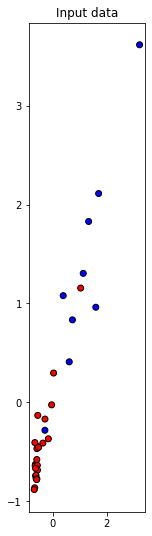

In [ ]:
h = 0.02  # step size in the mesh

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]


datasets = [
    df_data
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    #print(ds)
    y=ds.label
    X = ds[label_new]
    #print(y)
    #print(X)
    # preprocess dataset, split into training and test part
    
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )
    y_train_col = y_train
    print(y_train)
    colors = ['r', 'g', 'b', 'k']
    y_train_col.replace('Zero','r',inplace=True)
    y_train_col.replace('Uno','g',inplace=True)
    y_train_col.replace('Due','b',inplace=True)
    y_train_col.replace('Tre','k',inplace=True)
    print(y_train)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()